## Decision Trees 
* Problem:- Titanic Survivor Prediction Kaggle Challenge

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Dropping not useful columns
* Data Imputation-> Filling empty values(NaN) 

In [5]:
columns_to_drop=["PassengerId","Name","Ticket","Cabin","Embarked"]

In [6]:
data_clean=data.drop(columns_to_drop,axis=1 )

In [7]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### *Converting string data to numeric form using label Encoder 

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

data_clean["Sex"]=le.fit_transform(data_clean["Sex"])

In [10]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [12]:
data_clean=data_clean.fillna(data_clean["Age"].mean())

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [14]:
#Imputer ->Sklearn!

In [15]:
data_clean.loc[1]   #Accessing a data frame using loc property

Survived     1.0000
Pclass       1.0000
Sex          0.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Name: 1, dtype: float64

In [16]:
input_cols=['Pclass','Sex','Age','SibSp','Parch','Fare']
ouput_cols=['Survived']

X=data_clean[input_cols]
Y=data_clean[ouput_cols]

print(X.shape,Y.shape)
print(type(X))

(891, 6) (891, 1)
<class 'pandas.core.frame.DataFrame'>


## Define Entropy and Information Gain

In [17]:
def entropy(col):
    counts=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    
    ent=0.0
    
    for i in counts[1]:  #Freq
        p=i/N
        ent+=(-1.0*p*np.log2(p))
        
    return ent
    

In [18]:
col=np.array([0,0,0,1,0,1,1,1])
entropy(col)  #->gives unique value and their freq

1.0

In [19]:
#Equal no of freq-> Entropy=1  (max, due to more randomness/confusion)

In [20]:
def divide_data(x_data,fkey,fval):
    #Work with pandas DataFrame directly
    
    x_right=pd.DataFrame([],columns=x_data.columns)
    x_left=pd.DataFrame([],columns=x_data.columns)
    
    for i in range(x_data.shape[0]):
        val= x_data[fkey].loc[i]
        
        if val>fval:
            x_right=x_right.append(x_data.loc[i])
        if val<fval:
            x_left=x_left.append(x_data.loc[i])
            
 
    return x_left,x_right
    

In [21]:
#x_left,x_right=divide_data(data_clean[:10],'Sex',0.5)
#print(x_left)
#print(x_right)

In [22]:
def information_gain(x_data,fkey,fval):
    
    left,right=divide_data(x_data,fkey,fval)
    
    #% total samples on left and right
    l=float(left.shape[0])/x_data.shape[0]
    r=float(right.shape[0])/x_data.shape[0]
    
    #All examples comes to one side!
    #Examples can't be split further
    
    if left.shape[0]==0 or right.shape[0]==0:
        return -1000000 #MIN info gain->no further split
    
    #IG can't be minimised further 
    
    i_gain=entropy(x_data.Survived)-(l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain


In [23]:
# Test our function

for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.1798423792740207
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [24]:
class DecisionTree:
    
    #Constructor
    
    def __init__(self,depth=0,max_depth=5):
        #Limiting the tree depth to avoid overfitting
        #->Lead to poor generalisation
        
        self.left=None
        self.right=None
        self.fval=None
        self.fkey=None
        self.max_depth=max_depth
        self.depth=depth
        self.target=None
        
    def train(self,X_train):
        
        features=['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains=[]
        
        for ix in features:
            i_gain=information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey=features[np.argmax(info_gains)]
        self.fval=X_train[self.fkey].mean()
        print("Making Tree Features is ",self.fkey)
        
        #Split data
        
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
     
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        #Truly a leaf node    ->base case
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if X_train.Survived.mean()>=0.5:
                self.target="Survive"
            else:
                self.target="Dead"
            return 
        
        #Stop early when depth>=max depth   ->base case
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean()>=0.5:
                self.target="Survive"
            else:
                self.target="Dead"
            return 
        
        #Recursive Case
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #You can set the target at every node
        if X_train.Survived.mean()>=0.5:
            self.target="Survive"
        else:
            self.target="Dead"
        return 
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)
            

In [25]:
#d=DecisionTree()
#d.train(data_clean)

## Train-Validation-Test Set Split

In [26]:
split=int(0.7*data_clean.shape[0])
train_data=data_clean[:split]
test_data=data_clean[split:]
test_data=test_data.reset_index(drop=True)

In [27]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [28]:
dt= DecisionTree()

In [29]:
dt.train(train_data)

Making Tree Features is  Sex
Making Tree Features is  Pclass
Making Tree Features is  Age
Making Tree Features is  SibSp
Making Tree Features is  Pclass
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  SibSp
Making Tree Features is  Parch
Making Tree Features is  Pclass
Making Tree Features is  SibSp
Making Tree Features is  Fare
Making Tree Features is  Parch
Making Tree Features is  Age
Making Tree Features is  Pclass
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Parch
Making Tree Features is  SibSp
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Parch
Making Tree Features is  Fare
Making Tree Features is  Fare
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Fare
Making 

In [30]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [31]:
y_pred=[]
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))
    

In [32]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [33]:
y_actual=test_data[ouput_cols]
#print(y_actual)

In [34]:
le=LabelEncoder()
y_pred=le.fit_transform(y_pred)

In [35]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [36]:
y_pred=np.array(y_pred).reshape((-1,1))
print(y_pred.shape)
print(y_actual.shape)

(268, 1)
(268, 1)


In [37]:
acc=np.sum(y_pred==y_actual)/y_pred.shape[0]

In [38]:
print(acc)

Survived    0.817164
dtype: float64


## Decision Tree using Sklearn

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
sk_tree= DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [41]:
sk_tree.fit(train_data[input_cols],train_data[ouput_cols])  #output_cols

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [42]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [43]:
sk_tree.score(test_data[input_cols],test_data[ouput_cols])

0.8283582089552238

## Visualise a Decision tree

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [45]:
#plot_tree?

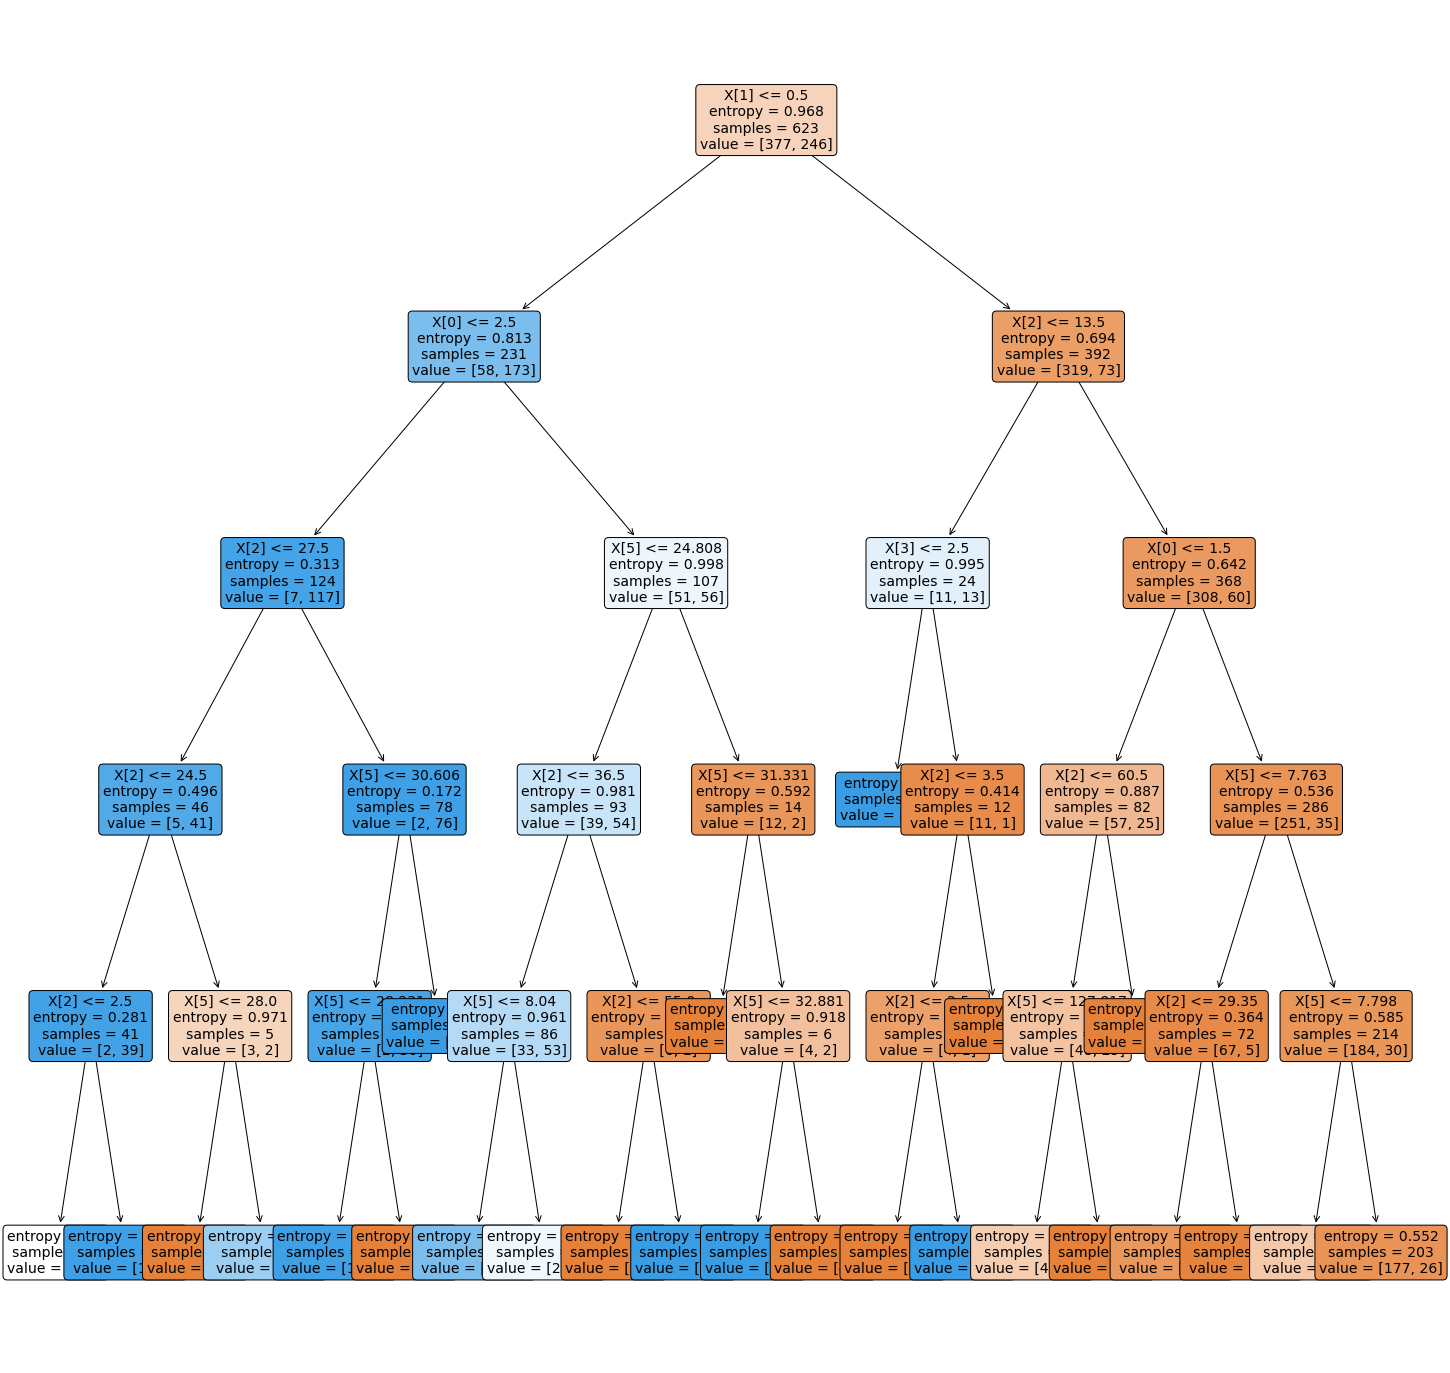

In [46]:
plt.figure(figsize=(25,25))
a = plot_tree(sk_tree, 
              label='all',
              filled=True, 
              rounded=True, 
              fontsize=14)

## Random Forests

In [48]:
X_train=train_data[input_cols]
Y_train=np.array(train_data[ouput_cols]).reshape((-1,))
X_test=test_data[input_cols]
Y_test=np.array(test_data[ouput_cols]).reshape((-1,))

In [50]:
sk_tree=DecisionTreeClassifier(criterion='entropy')
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.9823434991974318

In [52]:
sk_tree.score(X_test,Y_test)   #Overfitting

0.7873134328358209

In [53]:
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8443017656500803

In [55]:
sk_tree.score(X_test,Y_test)   #Depth Limited ->Comparable Accuracy

0.8283582089552238

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [58]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [59]:
rf.score(X_train,Y_train)

0.971107544141252

In [60]:
rf.score(X_test,Y_test)   #Overfitting

0.8283582089552238

In [67]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=3)
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.8138041733547352

In [68]:
rf.score(X_test,Y_test)   #Random forest->depth limited->Better

0.8134328358208955

In [64]:
from sklearn.model_selection import cross_val_score

In [71]:
Rforest=RandomForestClassifier(n_estimators=10,max_depth=5,criterion='entropy')
acc=cross_val_score(Rforest,X_train,Y_train,cv=5).mean()

In [72]:
print(acc)  #validation set accuracy

0.8121419354838709


## Variations In Random Forest Based on No. of Estimators

#### * No of estimators= No of trees used in the forest

In [74]:
acc_list=[]

for i in range(1,50):
    RF=RandomForestClassifier(n_estimators=i,max_depth=5)
    acc=cross_val_score(RF,X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [75]:
print(acc_list)

[0.7705548387096774, 0.7672903225806451, 0.788090322580645, 0.7897548387096774, 0.797741935483871, 0.8025677419354839, 0.8073548387096773, 0.8073419354838709, 0.8057290322580645, 0.8025677419354839, 0.7992774193548386, 0.8057677419354838, 0.8186064516129032, 0.8105419354838709, 0.8106064516129032, 0.7945419354838709, 0.8025419354838711, 0.8298193548387097, 0.8153548387096773, 0.8122193548387097, 0.8217677419354839, 0.8121548387096773, 0.8105290322580645, 0.8298193548387097, 0.8105290322580645, 0.8250064516129033, 0.8153548387096773, 0.8153935483870967, 0.812141935483871, 0.8105290322580645, 0.8105677419354839, 0.8121677419354839, 0.8137677419354838, 0.8202064516129031, 0.8218064516129033, 0.8153806451612903, 0.8105419354838709, 0.8234193548387096, 0.8138193548387097, 0.8185806451612903, 0.8121290322580645, 0.8073548387096775, 0.8201677419354839, 0.8121548387096773, 0.8233806451612903, 0.8250064516129033, 0.8153290322580645, 0.8185677419354839, 0.8137419354838709]


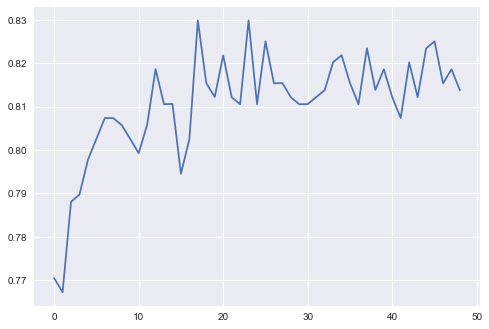

In [78]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)

In [82]:
print(np.max(acc_list))   #max acc
print(np.argmax(acc_list))   #no of trees ->wrt max acc

0.8298193548387097
17


* 18 trees give MAX accuracy
* 17 shown bcz indexing from 0

In [86]:
rf=RandomForestClassifier(n_estimators=18,criterion='entropy',max_depth=3)
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.8314606741573034

In [87]:

rf.score(X_test,Y_test)

0.8283582089552238